In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 1. Prepare the data

x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [4]:
# 2. Build the model
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b

In [5]:
# 3. Set the critetion: Cost function & Gradient Descent method

## reduce_mean: 평균
## square: 제곱

# mse 값
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
# set learning rate
optimizer = tf.train.GradientDescentOptimizer(0.001)
# loss와 optimizer연결
train = optimizer.minimize(loss)

In [7]:
# 4. Train the model

with tf.Session() as sess:
    # tf.Variables 초기화
    sess.run(tf.global_variables_initializer())
    print(sess.run(w), sess.run(b))
    print()
    
    # epoch, iteration = 10000
    for step in range(10000):
        sess.run(train)
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
            
    w_out, b_out = sess.run([w,b])

[2.9312658] [0.30370885]

Step 0: w [2.1601355] b [0.27398807]
loss 556.5336303710938

Step 1000: w [0.32475844] b [13.320217]
loss 147.2372283935547

Step 2000: w [-0.16185676] b [21.425442]
loss 80.05695343017578

Step 3000: w [-0.46272066] b [26.436733]
loss 54.37577819824219

Step 4000: w [-0.6487416] b [29.535158]
loss 44.55840301513672

Step 5000: w [-0.76375633] b [31.450882]
loss 40.80543518066406

Step 6000: w [-0.8348668] b [32.635323]
loss 39.37079620361328

Step 7000: w [-0.8788337] b [33.367653]
loss 38.82236099243164

Step 8000: w [-0.9060174] b [33.82043]
loss 38.612709045410156

Step 9000: w [-0.9228245] b [34.100372]
loss 38.53256607055664



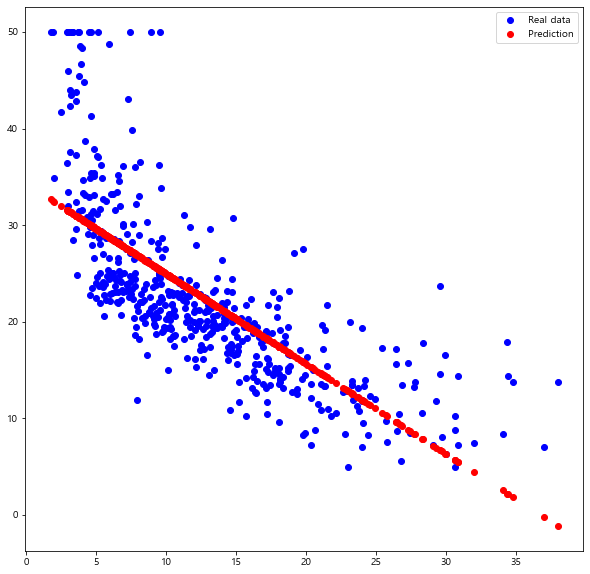

In [8]:
# 5. Visualize the result

plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data*w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()